<a href="https://colab.research.google.com/github/amish1995/TITANIC-Exploratory-Data-Analysis-EDA-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
train=pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Using visualization to check for null values

<Axes: >

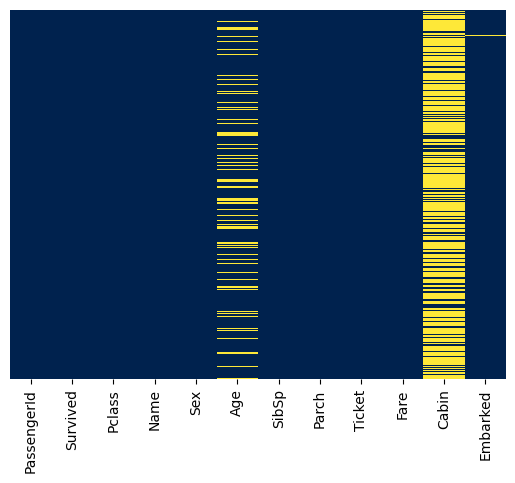

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

Roughly 20% of the Age data is missing, which is a manageable proportion. This allows us to consider reasonable imputation methods such as filling with the mean, median, or using more advanced techniques if needed.

In contrast, the Cabin column contains a significant amount of missing values—too much to handle effectively at a basic level. Instead of attempting to impute this data, we might choose to either drop the column or transform it into a binary feature such as Cabin_Known (1 if a cabin value is present, 0 otherwise).



We use Seaborn's countplot to visualize the number of passengers who survived versus those who did not.

<Axes: xlabel='Survived', ylabel='count'>

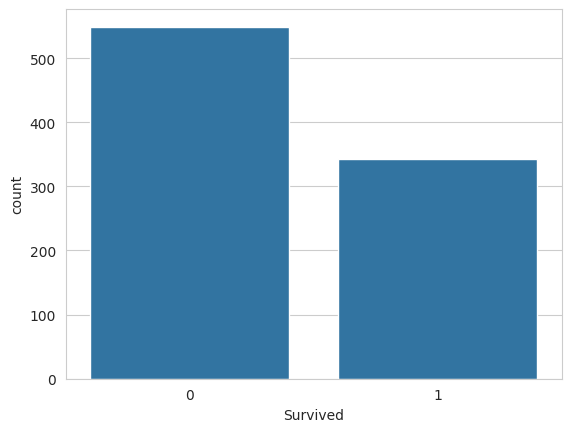

In [19]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train)

We use Seaborn's countplot to visualize the survival distribution, further broken down by passenger sex to observe how gender influenced survival rates.

<Axes: xlabel='Survived', ylabel='count'>

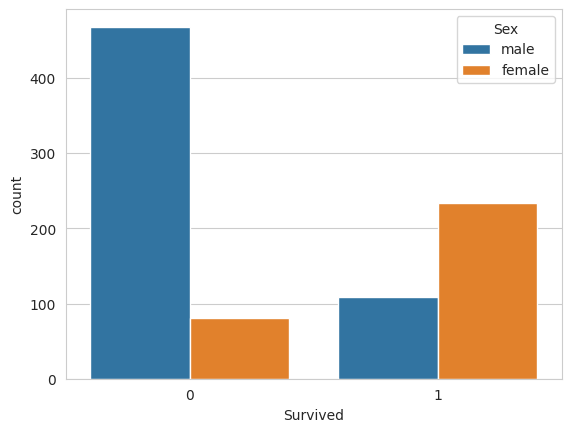

In [20]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train)

This countplot shows that more males did not survive, while most females survived the Titanic disaster. It highlights a clear relationship between gender and survival, likely due to the "women and children first" evacuation policy.









<Axes: xlabel='Survived', ylabel='count'>

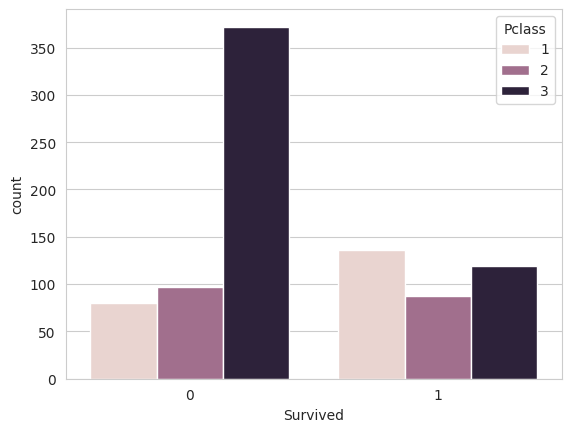

In [22]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

This countplot reveals that third-class passengers (Pclass 3) had the highest number of fatalities, while first-class passengers (Pclass 1) enjoyed the highest survival counts. Second-class passengers fall in between for both outcomes. Overall, there’s a strong positive association between higher class and survival rate.









It creates a histogram of the 'Age' column from the  DataFrame. to see number of people based on there age

<Axes: >

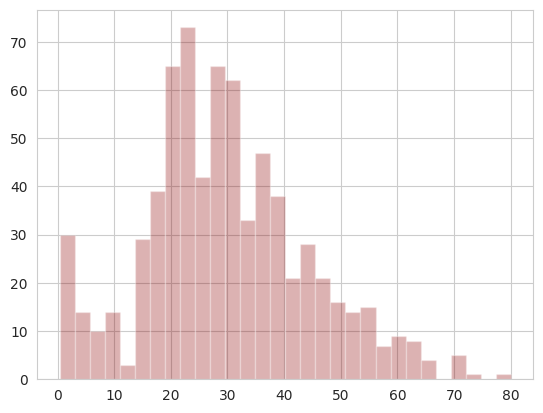

In [23]:

train['Age'].hist(bins=30,color='darkred',alpha=0.3)

Bar chart showing how many people there were for each number of siblings/spouses they had on the ship.

<Axes: xlabel='SibSp', ylabel='count'>

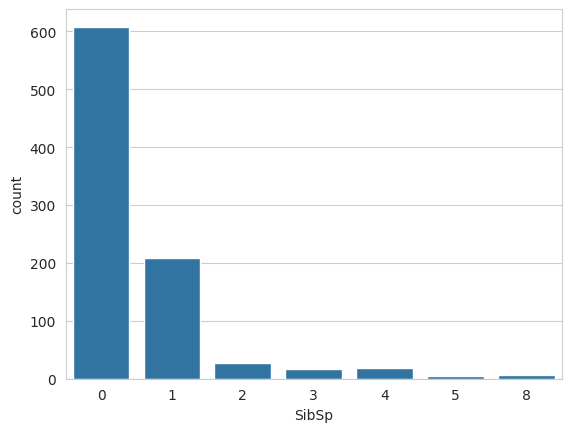

In [24]:

sns.countplot(x='SibSp',data=train)



 how many people paid within certain price ranges for their tickets.



<Axes: >

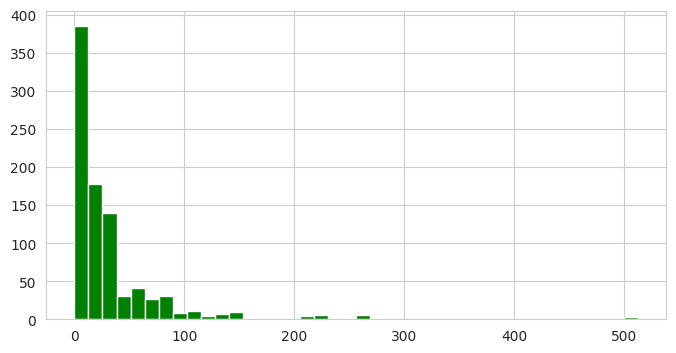

In [25]:

train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Age distributions across different passenger classes.

<Axes: xlabel='Pclass', ylabel='Age'>

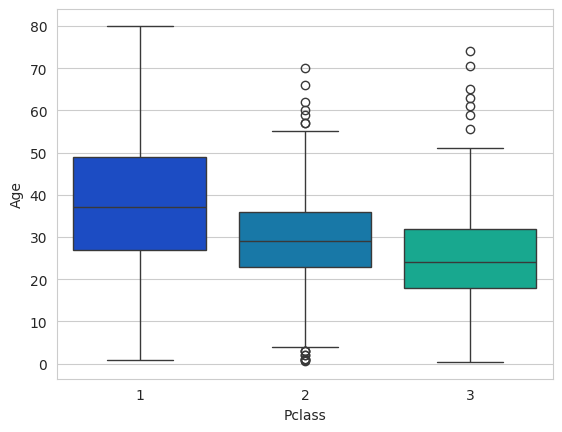

In [26]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The box plot clearly shows a trend: passengers in higher classes (like 1st class) generally appear to be older than those in lower classes (2nd and 3rd). This demographic insight is valuable for understanding the passenger makeup of each class and could be particularly useful for estimating any missing age data by leveraging the class information.


Fills in missing Age values based on a passenger's Pclass (ticket class). If an age is missing, it assigns an average age for that class (37 for 1st, 29 for 2nd, and 24 for 3rd)




In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [28]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


Now let's check that heat map again!

<Axes: >

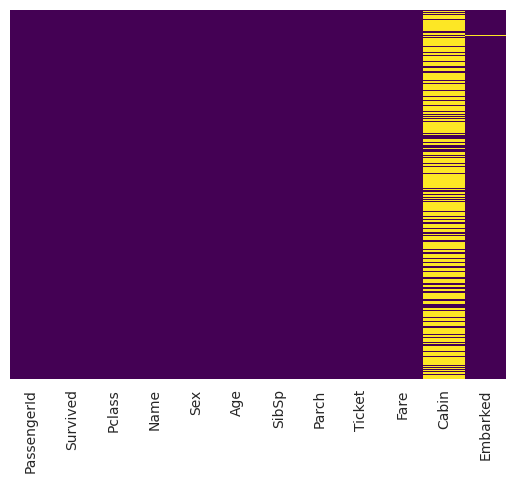

In [29]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:

train.drop('Cabin',axis=1,inplace=True)

<Axes: >

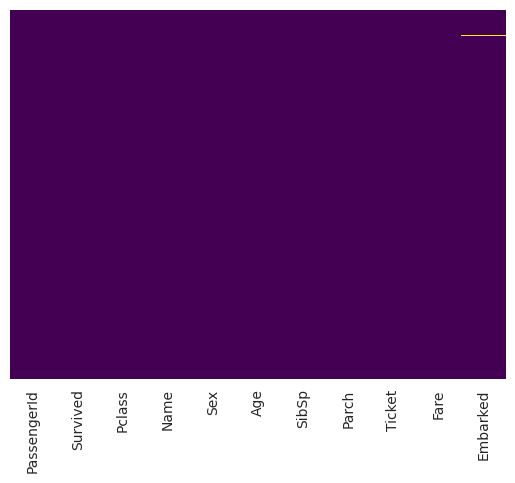

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This confirms that I have successfully handled the missing data in the 'Age' and 'Cabin' columns.



>

